In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from transformers import AdamW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('/content/Case2_dataset.csv')

In [7]:
df.head()

,label,text
0,Danish,Hvordan har du det?
1,Danish,"På trods af al sin rigdom og berømmelse, er ha..."
2,Danish,Jeg ved ikke hvad jeg skal gøre.
3,Danish,Han tror det er umuligt for mig at bestige bje...
4,Danish,Jeg kan ikke lide æg.


In [4]:
df.shape

(12000, 2)

In [7]:
import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    return ' '.join(tokens)

df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
df.head()

,label,text
0,Danish,hvordan har du det
1,Danish,på trods af al sin rigdom og berømmelse er han...
2,Danish,jeg ved ikke hvad jeg skal gøre
3,Danish,han tror det er umuligt for mig at bestige bje...
4,Danish,jeg kan ikke lide æg


In [11]:
df['label'].value_counts()

Danish        1000
Dutch         1000
English       1000
French        1000
German        1000
Swedish       1000
Italian       1000
Latin         1000
Portuguese    1000
Spanish       1000
Irish         1000
Polish        1000
Name: label, dtype: int64

In [12]:
X = df['text']
y = df['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## NAIVE BAYES

In [22]:
model = make_pipeline(TfidfVectorizer(ngram_range=(1, 4), analyzer='char'), MultinomialNB())

model.fit(X_train, y_train)
pred_labels = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, pred_labels,digits=4)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

      Danish     0.9709    0.9950    0.9828       201
       Dutch     1.0000    0.9801    0.9899       201
     English     0.9764    0.9857    0.9810       210
      French     0.9862    0.9954    0.9908       216
      German     0.9852    1.0000    0.9926       200
       Irish     1.0000    0.9910    0.9955       222
     Italian     0.9734    0.9839    0.9786       186
       Latin     1.0000    0.9333    0.9655       195
      Polish     1.0000    0.9947    0.9973       189
  Portuguese     0.9254    0.9947    0.9588       187
     Spanish     0.9677    0.9730    0.9704       185
     Swedish     1.0000    0.9567    0.9779       208

    accuracy                         0.9821      2400
   macro avg     0.9821    0.9820    0.9818      2400
weighted avg     0.9827    0.9821    0.9821      2400



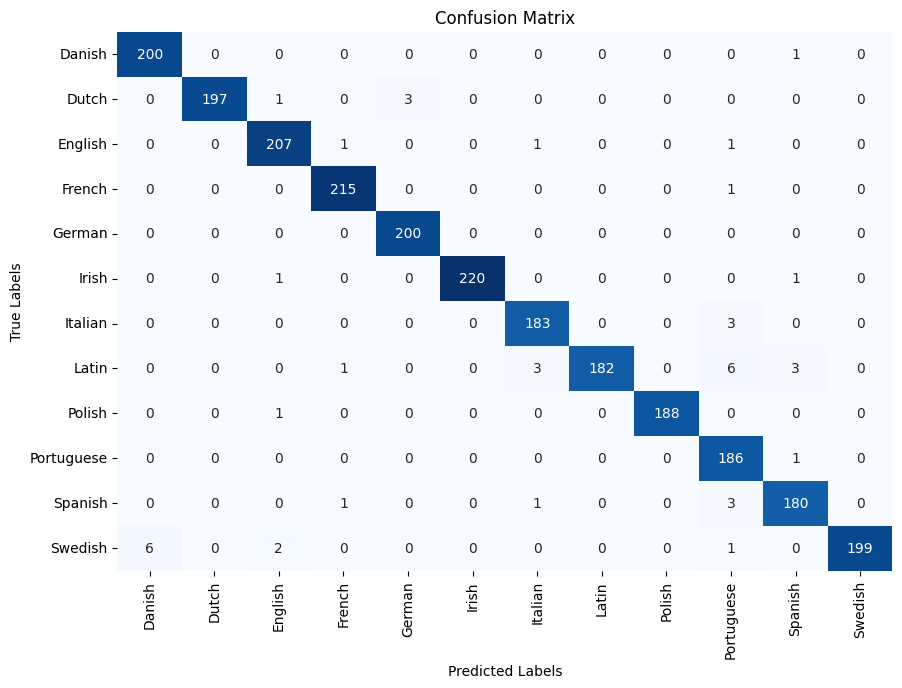

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = [
    'Danish', 'Dutch', 'English', 'French', 'German', 'Irish',
    'Italian', 'Latin', 'Polish', 'Portuguese', 'Spanish', 'Swedish']

conf_matrix = confusion_matrix(y_test, pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(TfidfVectorizer(ngram_range=(1, 5), analyzer='char'), LogisticRegression())

model.fit(X_train, y_train)
pred_labels = model.predict(X_test)

report = classification_report(y_test, pred_labels,digits=4)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

      Danish     0.9850    0.9801    0.9825       201
       Dutch     0.9950    0.9900    0.9925       201
     English     0.9951    0.9762    0.9856       210
      French     0.9906    0.9769    0.9837       216
      German     1.0000    0.9950    0.9975       200
       Irish     0.9955    0.9865    0.9910       222
     Italian     0.9482    0.9839    0.9657       186
       Latin     0.9461    0.9897    0.9674       195
      Polish     0.9895    0.9947    0.9921       189
  Portuguese     0.9784    0.9679    0.9731       187
     Spanish     0.9838    0.9838    0.9838       185
     Swedish     0.9902    0.9760    0.9831       208

    accuracy                         0.9833      2400
   macro avg     0.9831    0.9834    0.9832      2400
weighted avg     0.9836    0.9833    0.9834      2400



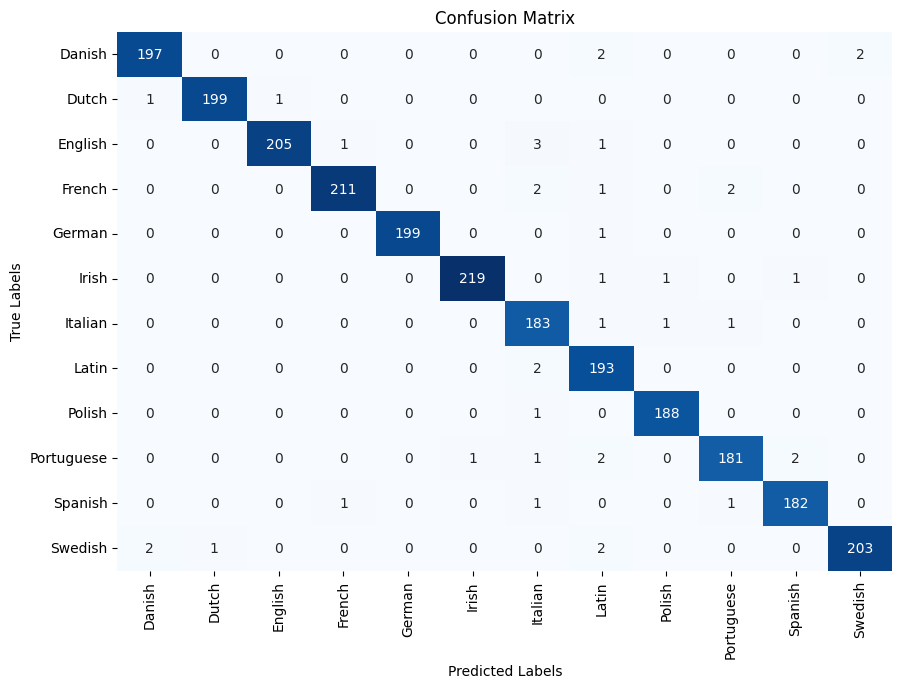

In [36]:
conf_matrix = confusion_matrix(y_test, pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## BERT

In [37]:
from transformers import DistilBertTokenizer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [38]:
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')
valid_encodings = tokenizer(X_valid.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')


In [39]:
import tensorflow as tf

train_labels = tf.convert_to_tensor(y_train.tolist())
valid_labels = tf.convert_to_tensor(y_valid.tolist())

In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels)).shuffle(1000).batch(32)
valid_dataset = tf.data.Dataset.from_tensor_slices((dict(valid_encodings), valid_labels)).batch(32)

In [41]:
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig

model_config = DistilBertConfig.from_pretrained('distilbert-base-multilingual-cased', num_labels=20)
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased', config=model_config)


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(train_dataset, validation_data=valid_dataset, epochs=3)

y_pred = np.argmax(model.predict(valid_dataset).logits, axis=1)
y_true = np.concatenate([y.numpy() for x, y in valid_dataset], axis=0)

report = classification_report(y_true, y_pred, digits=4)
print('Classification Report:')
print(report)

Epoch 1/3
300/300 [==============================] - 137s 329ms/step - loss: 0.3453 - accuracy: 0.9572 - val_loss: 0.0916 - val_accuracy: 0.9808
Epoch 2/3
300/300 [==============================] - 103s 343ms/step - loss: 0.0268 - accuracy: 0.9937 - val_loss: 0.0706 - val_accuracy: 0.9842
Epoch 3/3
75/75 [==============================] - 8s 84ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9898    0.9652    0.9773       201
           1     0.9950    0.9851    0.9900       201
           2     0.9905    0.9905    0.9905       210
           3     0.9817    0.9907    0.9862       216
           4     1.0000    0.9950    0.9975       200
           5     1.0000    0.9865    0.9932       222
           6     0.9534    0.9892    0.9710       186
           7     0.9843    0.9641    0.9741       195
           8     1.0000    1.0000    1.0000       189
           9     0.9893    0.9893    0.9893       187
          10     0.9840    0

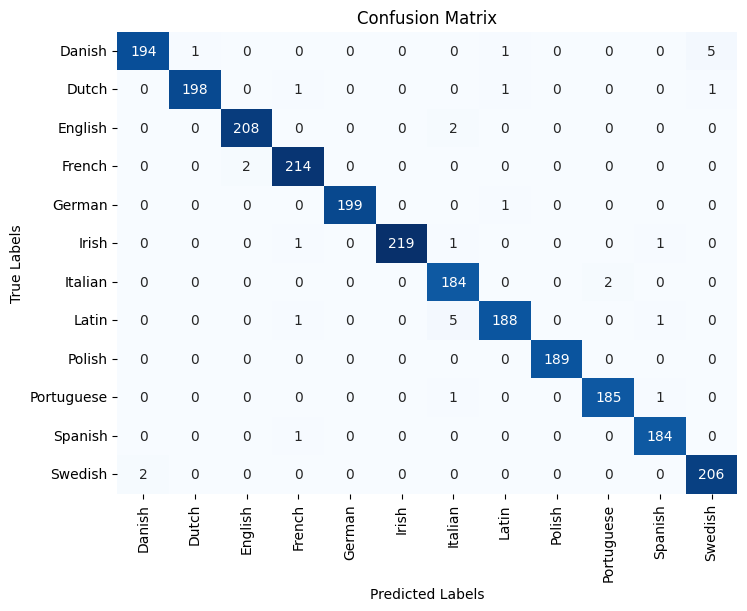

In [44]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

model.save_pretrained('/content/case2multilingual.csv')